In [1]:
%matplotlib inline
import os, sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib/keras_ex')
#from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from gkernel.sklearn import (
    RBFRegressor, RBFClassifier,
    make_model_gkernel1,
    make_model_gkernel2,
    make_model_gkernel3,
    make_model_out,
    make_model
)

In [3]:
# from sklearn.datasets import load_digits
# digits = load_digits()
# X, y = digits.data, digits.target
# X = X / 16
# X.shape, X.min(), X.max()

In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [5]:
X, y = mnist.data, mnist.target
X = X / 255
X.shape, X.min(), X.max()

((70000, 784), 0.0, 1.0)

In [6]:
y.shape

(70000,)

In [7]:
y_cat = to_categorical(y, num_classes=10)
y_cat.shape

(70000, 10)

In [8]:
(
    x_train, x_test,
    y_cat_train, y_cat_test,
    y_train, y_test
) = train_test_split(X, y_cat, y,
                     test_size=0.4,
                     stratify=y, random_state=10002)

(
    x_train.shape, x_test.shape,
    y_cat_train.shape, y_cat_test.shape,
    y_train.shape, y_test.shape
)

((42000, 784), (28000, 784), (42000, 10), (28000, 10), (42000,), (28000,))

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, validation_curve
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Lasso
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, r2_score, make_scorer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import joblib

from lightgbm import LGBMClassifier

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
def f1_scorer(estimator, X, y):
    pred = estimator.predict(X)
    s = f1_score(y, pred, average='macro')
    return s

## clf1

In [12]:
clf1 = RBFClassifier(
    num_lm=150,
    lm_select_from_x=True,
    random_state=10001,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/2),
    lr=0.05, gamma='scale',
    epochs=50, batch_size=500, verbose=0,
    session_clear=False
)
# clf1 = LGBMClassifier(min_child_samples=50, reg_alpha=0.1)

In [13]:
%%time
#hst = clf1.fit(x_train, y_cat_train)
hst = clf1.fit(x_train, y_train)

W1003 23:55:32.025313 140448021440320 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 23:55:32.040025 140448021440320 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1003 23:55:32.047770 140448021440320 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1003 23:55:32.048578 140448021440320 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. P

CPU times: user 2min 46s, sys: 8.2 s, total: 2min 54s
Wall time: 1min 35s


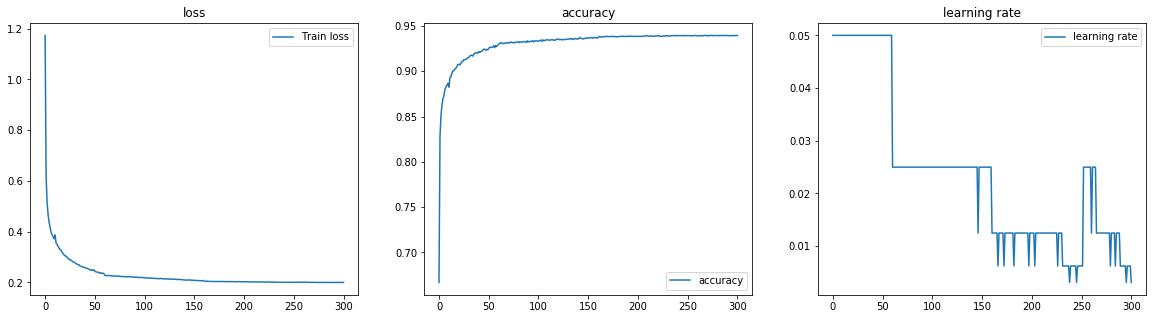

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [15]:
pred = clf1.predict(x_train)
pred.shape

(42000,)

In [16]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [17]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.9385677966514876
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      4142
         1.0       0.97      0.98      0.97      4726
         2.0       0.93      0.93      0.93      4194
         3.0       0.93      0.91      0.92      4285
         4.0       0.93      0.94      0.94      4094
         5.0       0.92      0.92      0.92      3788
         6.0       0.96      0.96      0.96      4125
         7.0       0.94      0.94      0.94      4376
         8.0       0.92      0.91      0.92      4095
         9.0       0.92      0.91      0.91      4175

   micro avg       0.94      0.94      0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000

[[4043    0   11    3    9   27   21    7   15    6]
 [   1 4613   22   11    8   10    7   13   35    6]
 [  19   19 3906   42   50   15   23   54   57    9]
 [   7   14   86 3914    5  110    7   37   72   33]

In [18]:
pred_test = clf1.predict(x_test)
pred_test.shape

(28000,)

In [19]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9358756800204739
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2761
         1.0       0.97      0.98      0.97      3151
         2.0       0.93      0.92      0.93      2796
         3.0       0.93      0.91      0.92      2856
         4.0       0.92      0.94      0.93      2730
         5.0       0.91      0.92      0.92      2525
         6.0       0.96      0.96      0.96      2751
         7.0       0.95      0.94      0.94      2917
         8.0       0.92      0.91      0.91      2730
         9.0       0.91      0.91      0.91      2783

   micro avg       0.94      0.94      0.94     28000
   macro avg       0.94      0.94      0.94     28000
weighted avg       0.94      0.94      0.94     28000

[[2694    0    7    1    0   20   18    2   14    5]
 [   1 3081   10   12    1   11    4    5   16   10]
 [  16   15 2580   27   43    7   20   22   60    6]
 [   2    3   50 2603    1   89    7   30   48   23]

## clf2

In [20]:
clf2 = RBFClassifier(
    num_lm=150,
    lm_select_from_x=True,
    random_state=10002,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/2),
    lr=0.05, gamma='scale',
    epochs=50, batch_size=500, verbose=0,
    session_clear=False
)
# clf2 = LGBMClassifier(min_child_samples=50, reg_alpha=0.1)

In [21]:
%%time
#hst = clf2.fit(x_train, y_cat_train)
hst = clf2.fit(x_train, y_train)

CPU times: user 2min 21s, sys: 2.32 s, total: 2min 23s
Wall time: 1min 18s


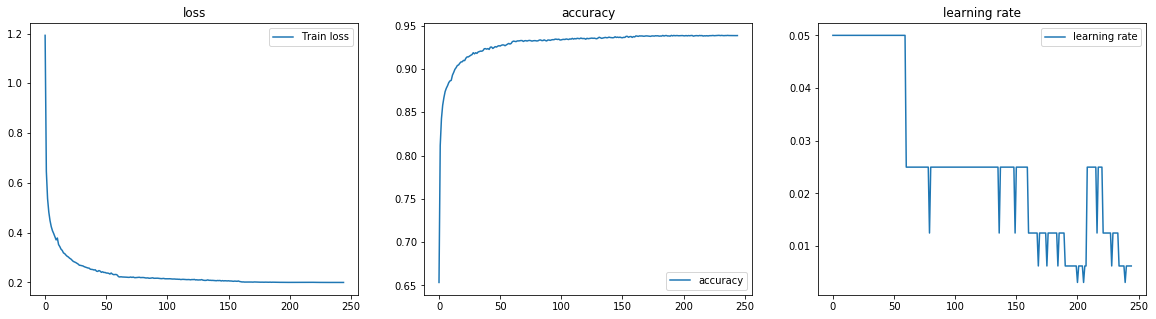

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [23]:
pred = clf2.predict(x_train)
pred.shape

(42000,)

In [24]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [25]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.937817889373194
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      4142
         1.0       0.97      0.98      0.97      4726
         2.0       0.93      0.93      0.93      4194
         3.0       0.92      0.91      0.92      4285
         4.0       0.93      0.94      0.93      4094
         5.0       0.92      0.92      0.92      3788
         6.0       0.95      0.97      0.96      4125
         7.0       0.94      0.94      0.94      4376
         8.0       0.93      0.91      0.92      4095
         9.0       0.92      0.91      0.91      4175

   micro avg       0.94      0.94      0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000

[[4042    0   14    6    7   18   21   11   21    2]
 [   0 4623   23   10    9   10    4   14   28    5]
 [  18   22 3890   48   52   22   36   48   45   13]
 [   5   17   82 3904    2  129    9   36   71   30]


In [26]:
pred_test = clf2.predict(x_test)
pred_test.shape

(28000,)

In [27]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9349879317028483
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2761
         1.0       0.97      0.98      0.98      3151
         2.0       0.92      0.93      0.92      2796
         3.0       0.93      0.91      0.92      2856
         4.0       0.92      0.93      0.93      2730
         5.0       0.92      0.92      0.92      2525
         6.0       0.95      0.96      0.96      2751
         7.0       0.94      0.93      0.94      2917
         8.0       0.92      0.91      0.91      2730
         9.0       0.91      0.90      0.91      2783

   micro avg       0.94      0.94      0.94     28000
   macro avg       0.93      0.94      0.93     28000
weighted avg       0.94      0.94      0.94     28000

[[2700    0   15    1    0   11   15    4   14    1]
 [   1 3088   13   11    1    6    2    5   17    7]
 [   7   11 2591   28   43    7   25   20   61    3]
 [   7    5   45 2598    0   95    8   26   50   22]

## clf3

In [28]:
clf3 = RBFClassifier(
    num_lm=150,
    lm_select_from_x=True,
    random_state=10003,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/2),
    lr=0.05, gamma='scale',
    epochs=50, batch_size=500, verbose=0,
    session_clear=False
)
# clf3 = LGBMClassifier(min_child_samples=50, reg_alpha=0.1)

In [29]:
%%time
#hst = clf3.fit(x_train, y_cat_train)
hst = clf3.fit(x_train, y_train)

CPU times: user 2min 21s, sys: 2.48 s, total: 2min 23s
Wall time: 1min 18s


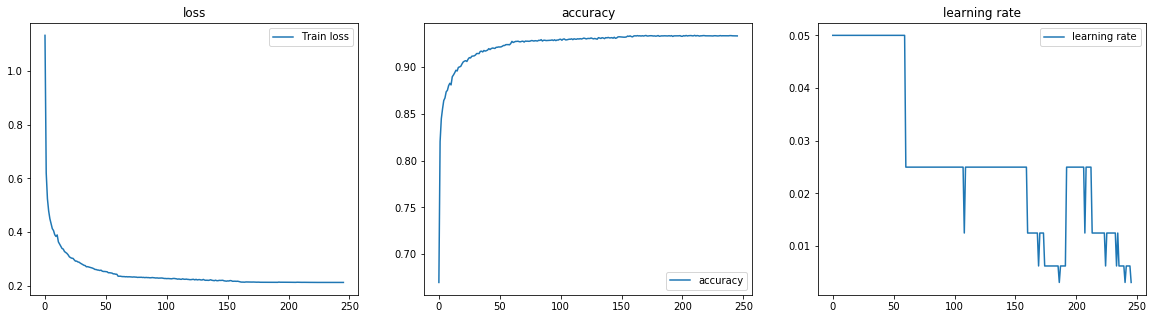

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [31]:
pred = clf3.predict(x_train)
pred.shape

(42000,)

In [32]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [33]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.932622231598988
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      4142
         1.0       0.97      0.97      0.97      4726
         2.0       0.92      0.92      0.92      4194
         3.0       0.92      0.92      0.92      4285
         4.0       0.93      0.94      0.93      4094
         5.0       0.91      0.91      0.91      3788
         6.0       0.95      0.96      0.95      4125
         7.0       0.94      0.93      0.93      4376
         8.0       0.91      0.90      0.91      4095
         9.0       0.91      0.90      0.90      4175

   micro avg       0.93      0.93      0.93     42000
   macro avg       0.93      0.93      0.93     42000
weighted avg       0.93      0.93      0.93     42000

[[4033    0    8    7    5   27   25    6   19   12]
 [   0 4606   22   14    8   19    5   15   32    5]
 [  20   20 3857   47   49   15   44   56   73   13]
 [   8   22   77 3925    5  109    8   31   73   27]


In [34]:
pred_test = clf3.predict(x_test)
pred_test.shape

(28000,)

In [35]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9320364251967502
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2761
         1.0       0.97      0.98      0.97      3151
         2.0       0.92      0.92      0.92      2796
         3.0       0.93      0.91      0.92      2856
         4.0       0.93      0.93      0.93      2730
         5.0       0.92      0.91      0.91      2525
         6.0       0.95      0.96      0.95      2751
         7.0       0.93      0.93      0.93      2917
         8.0       0.90      0.91      0.90      2730
         9.0       0.91      0.90      0.90      2783

   micro avg       0.93      0.93      0.93     28000
   macro avg       0.93      0.93      0.93     28000
weighted avg       0.93      0.93      0.93     28000

[[2694    0    7    3    1   16   15    3   13    9]
 [   1 3078   10   13    3   13    4    5   17    7]
 [   8   12 2569   24   35   10   37   28   67    6]
 [   7    5   50 2599    0   74    8   29   60   24]

In [36]:
clfs = [clf1, clf2, clf3]

In [37]:
pred_proba = [clf.predict_proba(x_train) for clf in clfs]

In [38]:
np.stack(pred_proba).mean(axis=0).shape

(42000, 10)

In [39]:
print('F1_SCORE :', f1_score(y_train, np.argmax(np.stack(pred_proba).mean(axis=0), axis=1), average='macro'))
print(classification_report(y_train, np.argmax(np.stack(pred_proba).mean(axis=0), axis=1)))
print(confusion_matrix(y_train, np.argmax(np.stack(pred_proba).mean(axis=0), axis=1)))

F1_SCORE : 0.9422330774198109
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      4142
         1.0       0.97      0.98      0.97      4726
         2.0       0.93      0.93      0.93      4194
         3.0       0.93      0.92      0.93      4285
         4.0       0.93      0.95      0.94      4094
         5.0       0.92      0.93      0.93      3788
         6.0       0.96      0.97      0.96      4125
         7.0       0.95      0.94      0.95      4376
         8.0       0.93      0.92      0.92      4095
         9.0       0.92      0.91      0.92      4175

   micro avg       0.94      0.94      0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000

[[4060    0   12    5    6   13   20    8   15    3]
 [   0 4620   20   11    8   15    6   14   27    5]
 [  19   18 3905   40   48   16   32   51   54   11]
 [   6   17   77 3936    4  104    9   34   70   28]

In [40]:
pred_proba_test = [clf.predict_proba(x_test) for clf in clfs]

In [41]:
np.stack(pred_proba_test).mean(axis=0).shape

(28000, 10)

In [42]:
print('F1_SCORE :', f1_score(y_test, np.argmax(np.stack(pred_proba_test).mean(axis=0), axis=1), average='macro'))
print(classification_report(y_test, np.argmax(np.stack(pred_proba_test).mean(axis=0), axis=1)))
print(confusion_matrix(y_test, np.argmax(np.stack(pred_proba_test).mean(axis=0), axis=1)))

F1_SCORE : 0.9406185231558952
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2761
         1.0       0.97      0.98      0.98      3151
         2.0       0.93      0.93      0.93      2796
         3.0       0.93      0.92      0.93      2856
         4.0       0.93      0.94      0.93      2730
         5.0       0.92      0.93      0.93      2525
         6.0       0.96      0.97      0.96      2751
         7.0       0.95      0.94      0.94      2917
         8.0       0.92      0.92      0.92      2730
         9.0       0.92      0.91      0.92      2783

   micro avg       0.94      0.94      0.94     28000
   macro avg       0.94      0.94      0.94     28000
weighted avg       0.94      0.94      0.94     28000

[[2706    1    7    1    0   14   14    3   11    4]
 [   1 3083   11   12    2   10    2    5   17    8]
 [   9   11 2601   24   40    5   24   22   57    3]
 [   4    4   41 2626    1   81    7   27   44   21]